<h1>Zadanie 12</h1>
<h2>CYFROWE PRZETWARZANIE SYGNAŁÓW I OBRAZÓW <br>
Przetwarzanie i analiza sygnału EKG</h2>
<h3>
Kasper Radom 264023 <br>
Maciej Szymczak 263978</h3>

In [16]:
%matplotlib ipympl
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from skimage import filters
from skimage.morphology import disk
from skimage.filters import rank, laplace, sobel, gaussian
from skimage.exposure import rescale_intensity
from IPython.display import display
from matplotlib.widgets import RectangleSelector

def readImage(imageName):
    global image
    image = ski.io.imread(imageName)

In [17]:
def filterLaplace(imageName):
    readImage(imageName)
    filteredImage = image + (-1) * ski.filters.laplace(image) ** 2
    return filteredImage

image_name = 'bonescan.tif'
image = ski.io.imread(image_name)

a) Oryginalny obraz
b) Laplacjan obrazu (a)

In [18]:
laplacian_image = filterLaplace(image_name)

c) Suma obrazów (a) i (b)

In [19]:
sum_laplacian = image + laplacian_image

d) Gradiend Sobela obrazu (a)

In [20]:
sobel_image = sobel(image)

e) Filtracja uśredniająca z maską 5x5 obrazu (d)

In [21]:
avg_filter_image = gaussian(sobel_image, sigma=1)

f) Iloczyn obrazu (e) i laplasjanu (b)

In [22]:
mult_image = avg_filter_image * laplacian_image

g) Suma (a) i (f)

In [23]:
sum_image = image + mult_image

h) Transformacja potęgowa (g)
Przycinanie wartości ujemnych do zera przed pierwiastkowaniem

In [24]:
sum_image_clipped = np.clip(sum_image, 0, None)
gamma_corrected = rescale_intensity(np.sqrt(sum_image_clipped))

Wyświetlanie wyników

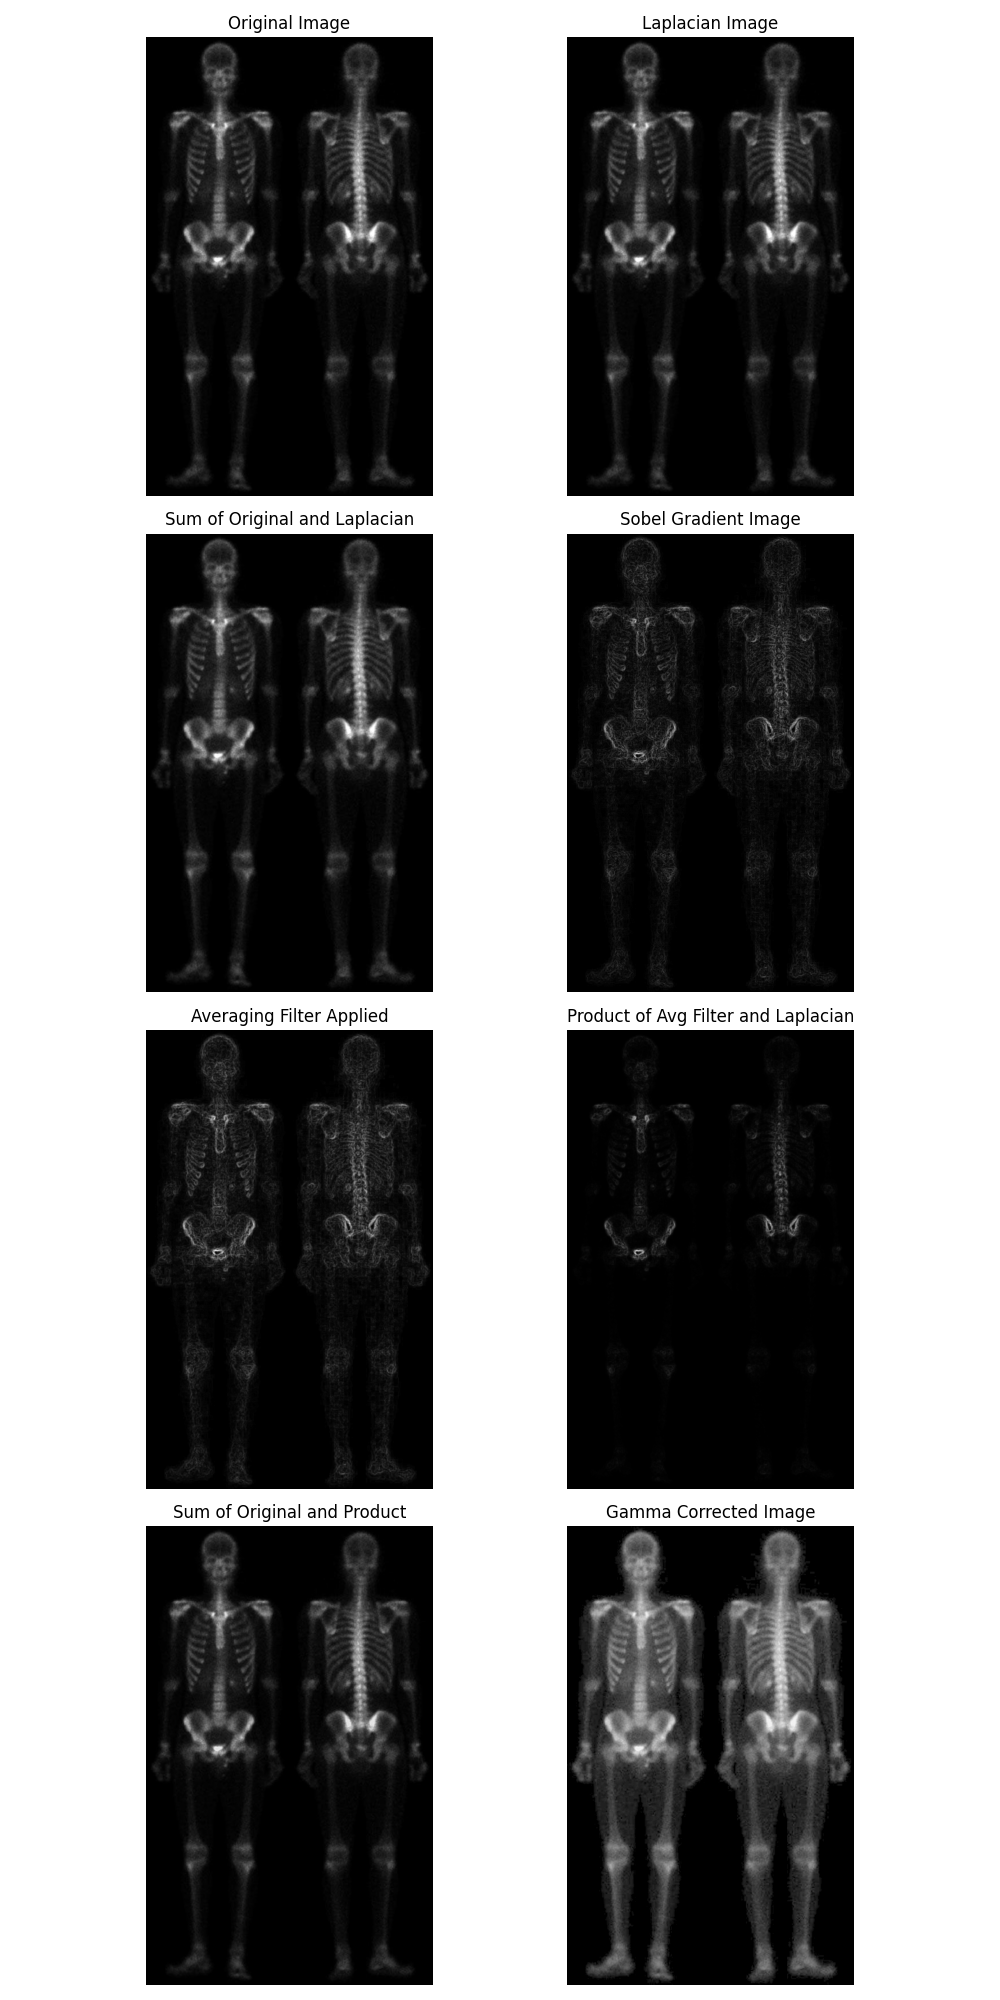

In [25]:
fig, ax = plt.subplots(4, 2, figsize=(10, 20), sharex=True, sharey=True)
ax = ax.ravel()

# Wyostrzony obraz po dodaniu laplasjanu
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(laplacian_image, cmap='gray')
ax[1].set_title('Laplacian Image')

ax[2].imshow(sum_laplacian, cmap='gray')
ax[2].set_title('Sum of Original and Laplacian')

ax[3].imshow(sobel_image, cmap='gray')
ax[3].set_title('Sobel Gradient Image')

ax[4].imshow(avg_filter_image, cmap='gray')
ax[4].set_title('Averaging Filter Applied')

ax[5].imshow(mult_image, cmap='gray')
ax[5].set_title('Product of Avg Filter and Laplacian')

ax[6].imshow(sum_image, cmap='gray')
ax[6].set_title('Sum of Original and Product')

ax[7].imshow(gamma_corrected, cmap='gray')
ax[7].set_title('Gamma Corrected Image')

for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()
